In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:/Users/sgrka/OneDrive/Documents/Buy now pay later/loan_working_ML.csv")


In [3]:
#Check the top rows
df.head()

,Loan_Amt,Int_Rate,Sub_Grade_M,Emp_Length,Home_Ownership,Annual_Inc,Verification_Status,Total_Dti,Delinq_2Yrs,Mort_Acc,Pub_Rec_Bankruptcies,Credit_Limit,Total_Bal_Ex_Mort,Loan_Status
0,2500,13.56,C,10.0,RENT,55000.0,Not Verified,18.24,0,0,1,60124,16901,0
1,30000,18.94,D,10.0,MORTGAGE,90000.0,Source Verified,26.52,0,3,1,372872,99468,0
2,5000,17.97,D,6.0,MORTGAGE,59280.0,Source Verified,10.51,0,2,0,136927,11749,0
3,4000,18.94,D,10.0,MORTGAGE,92000.0,Source Verified,16.74,0,3,0,385183,36151,0
4,30000,16.14,C,10.0,MORTGAGE,57250.0,Not Verified,26.35,0,2,0,157548,29674,0


In [4]:
#check the bottom rows
df.tail()

,Loan_Amt,Int_Rate,Sub_Grade_M,Emp_Length,Home_Ownership,Annual_Inc,Verification_Status,Total_Dti,Delinq_2Yrs,Mort_Acc,Pub_Rec_Bankruptcies,Credit_Limit,Total_Bal_Ex_Mort,Loan_Status
1048569,25000,16.99,D,2.0,MORTGAGE,90000.0,Not Verified,17.48,0,7,0,337698,64487,0
1048570,24825,16.55,D,1.0,RENT,252000.0,Source Verified,19.59,0,1,0,292355,192443,0
1048571,19650,13.33,C,10.0,OWN,95000.0,Verified,32.44,0,2,0,297400,183091,0
1048572,31200,19.99,E,1.0,OWN,65000.0,Source Verified,16.01,0,0,0,55705,39135,0
1048573,25000,13.33,C,1.0,MORTGAGE,137000.0,Verified,10.84,0,2,1,722979,34492,0


In [5]:
column_names = df.columns.tolist()
print(column_names)


['Loan_Amt', 'Int_Rate', 'Sub_Grade_M', 'Emp_Length', 'Home_Ownership', 'Annual_Inc', 'Verification_Status', 'Total_Dti', 'Delinq_2Yrs', 'Mort_Acc', 'Pub_Rec_Bankruptcies', 'Credit_Limit', 'Total_Bal_Ex_Mort', 'Loan_Status']


In [6]:
#Checking of statistical veiw 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amt,1048574.0,15384.887380,9533.832001,1000.00,8000.00,13000.00,20000.00,40000.00
Int_Rate,1048574.0,12.802883,4.962750,5.31,9.16,11.99,15.49,30.99
Emp_Length,971110.0,6.018484,3.603447,1.00,2.00,6.00,10.00,10.00
Annual_Inc,1048574.0,79674.635051,84101.867634,0.00,47000.00,66000.00,95000.00,9930475.00
Total_Dti,1047377.0,19.289330,15.896030,-1.00,11.93,18.05,25.02,999.00
Delinq_2Yrs,1048574.0,0.297450,0.857936,0.00,0.00,0.00,0.00,58.00
Mort_Acc,1048574.0,1.464477,1.804810,0.00,0.00,1.00,2.00,87.00
Pub_Rec_Bankruptcies,1048574.0,0.132404,0.368578,0.00,0.00,0.00,0.00,9.00
Credit_Limit,1048574.0,181512.376220,185585.082962,0.00,51895.00,115606.00,262282.75,9999999.00
Total_Bal_Ex_Mort,1048574.0,52306.653015,51568.345714,0.00,20912.00,38594.00,66337.00,2622906.00


In [7]:
#data distribution
print(f'The data contains:\n Number of rows: {df.shape[0]}\n Number of Columns: {df.shape[1]}')

The data contains:
 Number of rows: 1048574
 Number of Columns: 14


In [8]:
#Check the null values
df.isnull().sum()

Loan_Amt                    0
Int_Rate                    0
Sub_Grade_M                 0
Emp_Length              77464
Home_Ownership              0
Annual_Inc                  0
Verification_Status         0
Total_Dti                1197
Delinq_2Yrs                 0
Mort_Acc                    0
Pub_Rec_Bankruptcies        0
Credit_Limit                0
Total_Bal_Ex_Mort           0
Loan_Status                 0
dtype: int64

In [9]:
#getting the percentage of null values
round(df.isnull().sum()*100/df.shape[0],2)

Loan_Amt                0.00
Int_Rate                0.00
Sub_Grade_M             0.00
Emp_Length              7.39
Home_Ownership          0.00
Annual_Inc              0.00
Verification_Status     0.00
Total_Dti               0.11
Delinq_2Yrs             0.00
Mort_Acc                0.00
Pub_Rec_Bankruptcies    0.00
Credit_Limit            0.00
Total_Bal_Ex_Mort       0.00
Loan_Status             0.00
dtype: float64

In [10]:
#Replace the null values with mean for numerical columns and mode for categorical columns
df['Emp_Length'].fillna(df['Emp_Length'].mean(),inplace=True)
df['Total_Dti'].fillna(df['Total_Dti'].mean(),inplace=True)

In [11]:
#Check the null vales after replacement
df.isnull().sum()*100/df.shape[0]

Loan_Amt                0.0
Int_Rate                0.0
Sub_Grade_M             0.0
Emp_Length              0.0
Home_Ownership          0.0
Annual_Inc              0.0
Verification_Status     0.0
Total_Dti               0.0
Delinq_2Yrs             0.0
Mort_Acc                0.0
Pub_Rec_Bankruptcies    0.0
Credit_Limit            0.0
Total_Bal_Ex_Mort       0.0
Loan_Status             0.0
dtype: float64

In [12]:
# Retrieve the column names as a list
cat_val = list(df.columns)


In [13]:
#Print all the variables with value counts
for column in cat_val:
    print(df[column].value_counts())
    print("#"*40)

10000    95913
20000    66458
15000    59489
12000    54246
5000     43740
         ...  
35675        3
37375        3
35125        3
37650        2
36075        2
Name: Loan_Amt, Length: 1561, dtype: int64
########################################
5.32     25677
11.99    21522
11.49    19707
13.99    17948
13.67    14496
         ...  
14.77        2
15.29        2
16.90        1
13.19        1
11.16        1
Name: Int_Rate, Length: 255, dtype: int64
########################################
B    312159
C    293596
A    226847
D    144272
E     53221
F     14772
G      3707
Name: Sub_Grade_M, dtype: int64
########################################
10.000000    350501
1.000000     155833
2.000000      94672
3.000000      84904
6.018484      77464
5.000000      64421
4.000000      63901
6.000000      45279
8.000000      40873
7.000000      36595
9.000000      34131
Name: Emp_Length, dtype: int64
########################################
MORTGAGE    509736
RENT        411721
OWN         1265

In [14]:
obj=df.select_dtypes(include="object").columns
obj

Index(['Sub_Grade_M', 'Home_Ownership', 'Verification_Status'], dtype='object')

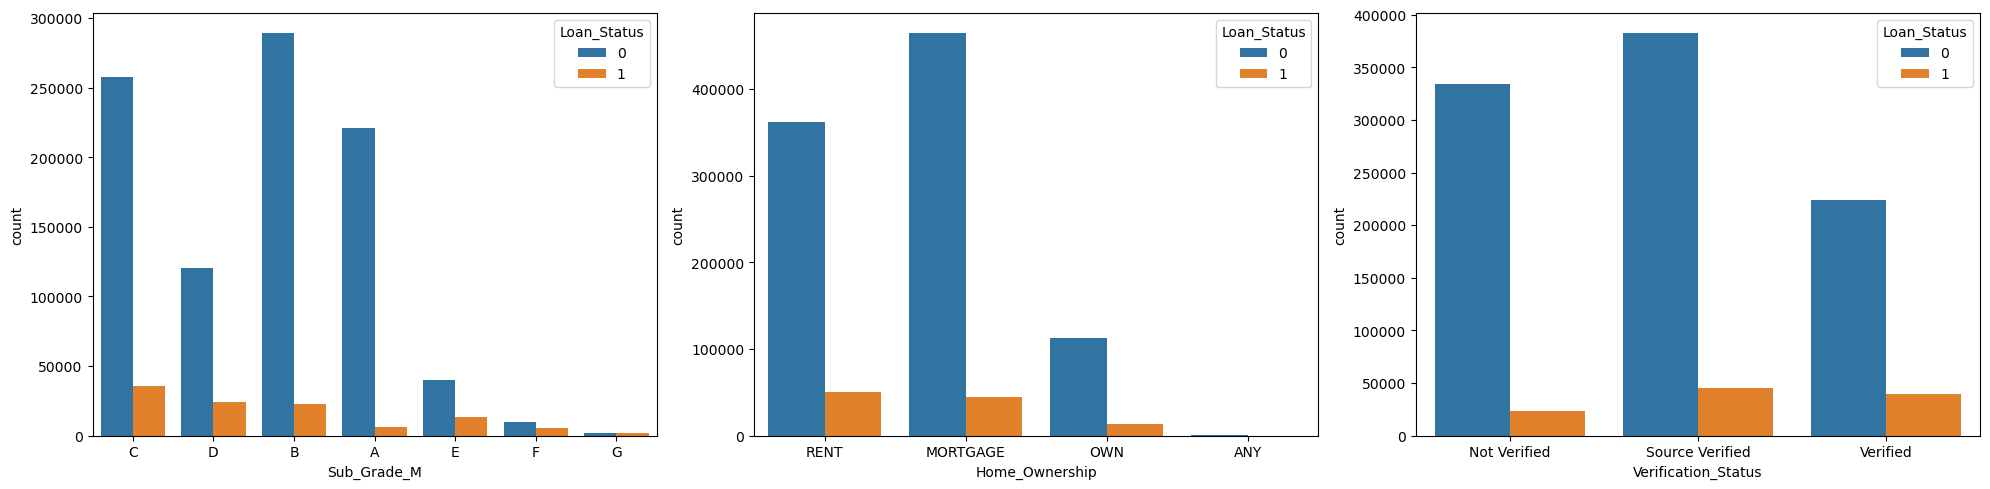

In [15]:
#Distribution of the categorical values using count plot with default status
obj1=['Sub_Grade_M', 'Home_Ownership', 'Verification_Status']
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
axs=axs.flatten()
for i,var in enumerate (obj1):
    sns.countplot(data=df,x=var,hue='Loan_Status',ax=axs[i])
plt.tight_layout()
plt.show()

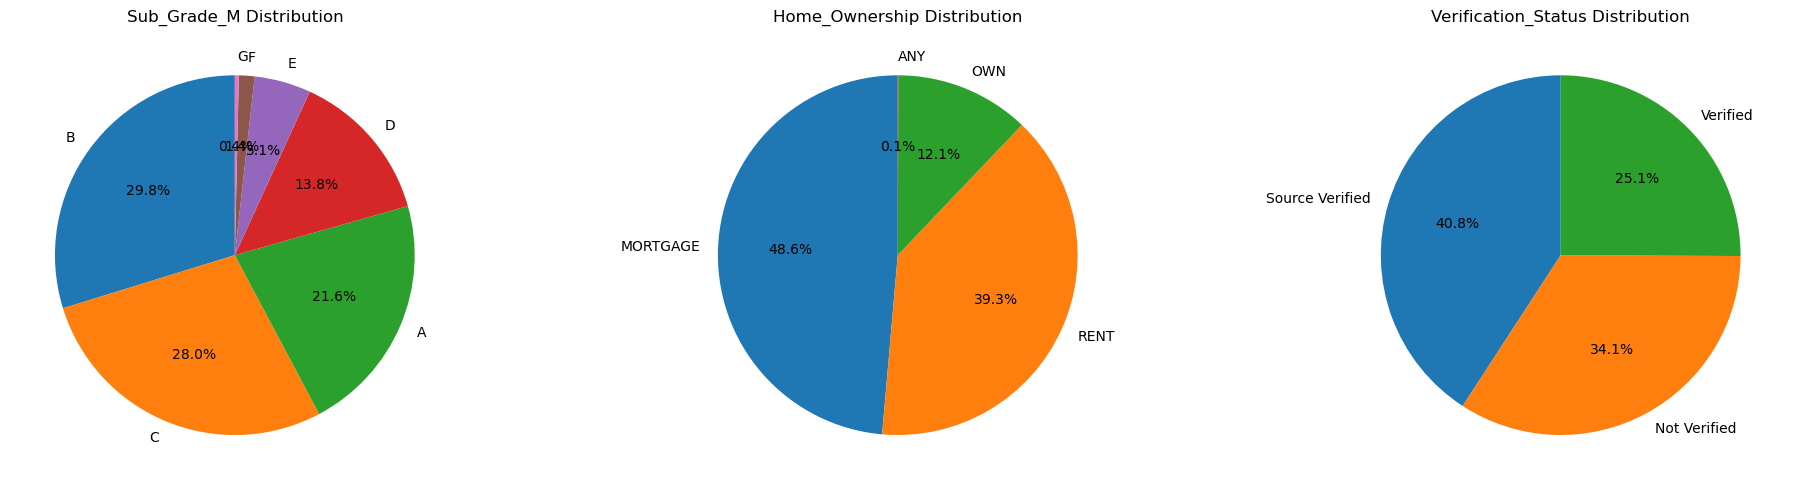

In [16]:
#categorical values distribution
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,5))

for i,var in enumerate (obj1):
    if i <len(axs.flat):
        obj_cont=df[var].value_counts()
        axs.flat[i].pie(obj_cont,labels=obj_cont.index,autopct="%1.1f%%",startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()

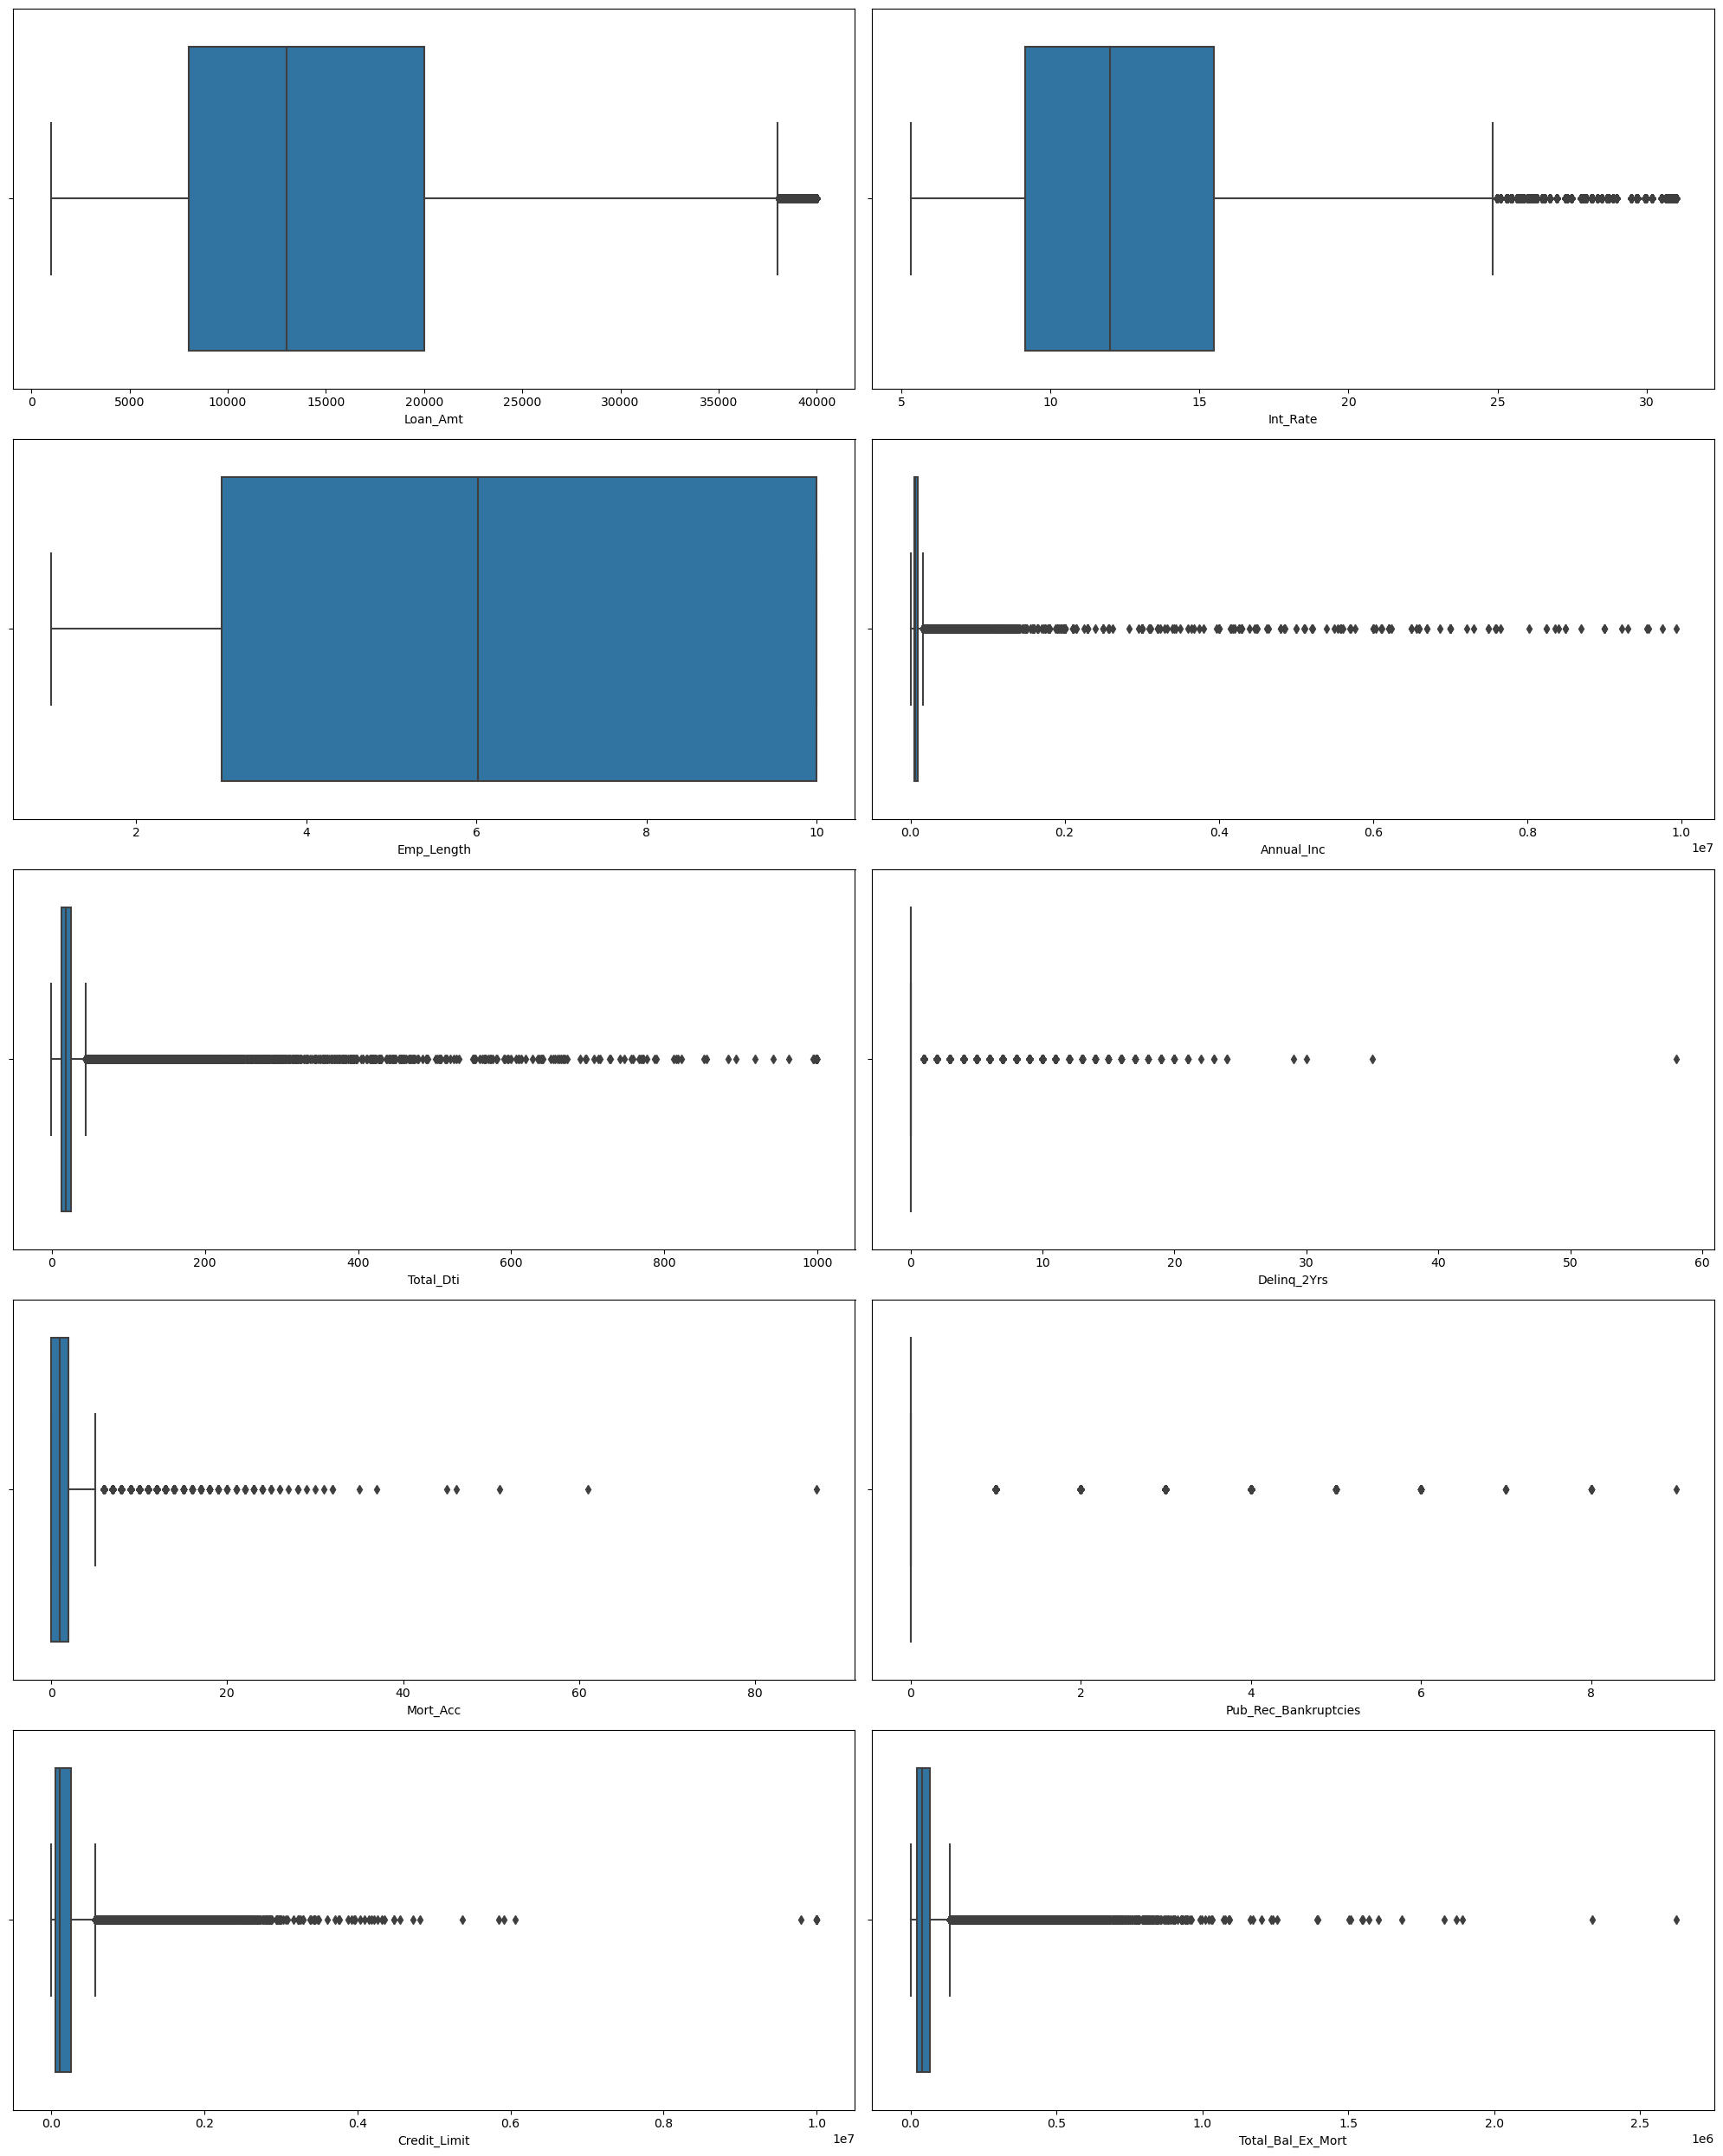

In [17]:
# Corrected numerical variables
num = ['Loan_Amt', 'Int_Rate', 'Emp_Length', 'Annual_Inc', 'Total_Dti', 'Delinq_2Yrs', 'Mort_Acc', 'Pub_Rec_Bankruptcies', 'Credit_Limit', 'Total_Bal_Ex_Mort']

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axs = axs.flatten()

# Plot boxplots for each numerical variable
for i, var in enumerate(num):
    sns.boxplot(data=df, x=var, ax=axs[i])

# Adjust layout
fig.tight_layout()
plt.show()


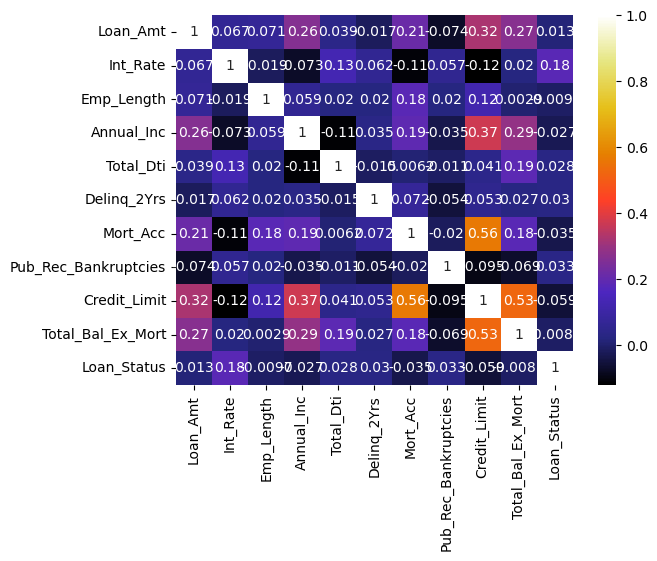

In [18]:
#Correlation Matrix
sns.heatmap(data=df.corr(),cmap='CMRmap',annot=True);

In [19]:
#import the necessary libraries for Chi_square test
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore

In [20]:
#Select the categorical variables for chi_squrae test
obj=df.select_dtypes(include='object').columns
obj

Index(['Sub_Grade_M', 'Home_Ownership', 'Verification_Status'], dtype='object')

Sub_Grade_M:


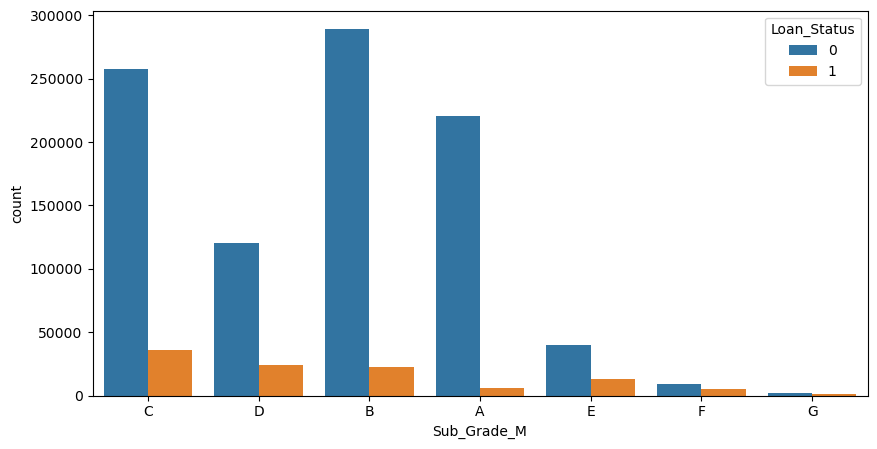

'Sub_Grade_M' is a good predictor
p_val=0.0

Home_Ownership:


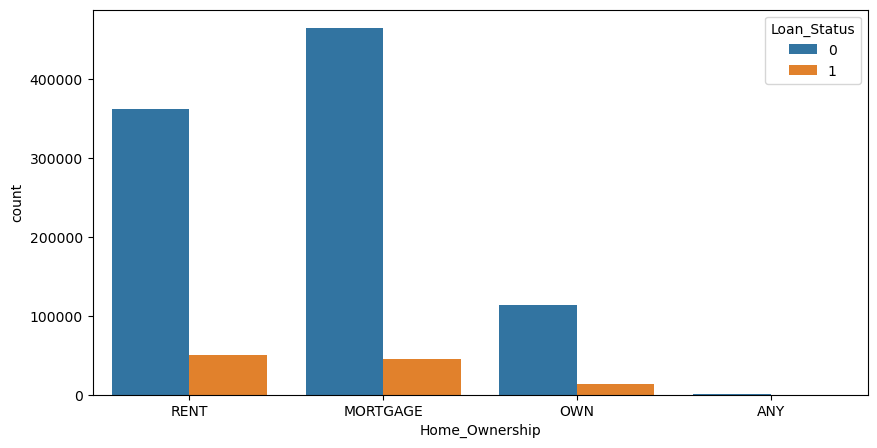

'Home_Ownership' is a good predictor
p_val=0.0

Verification_Status:


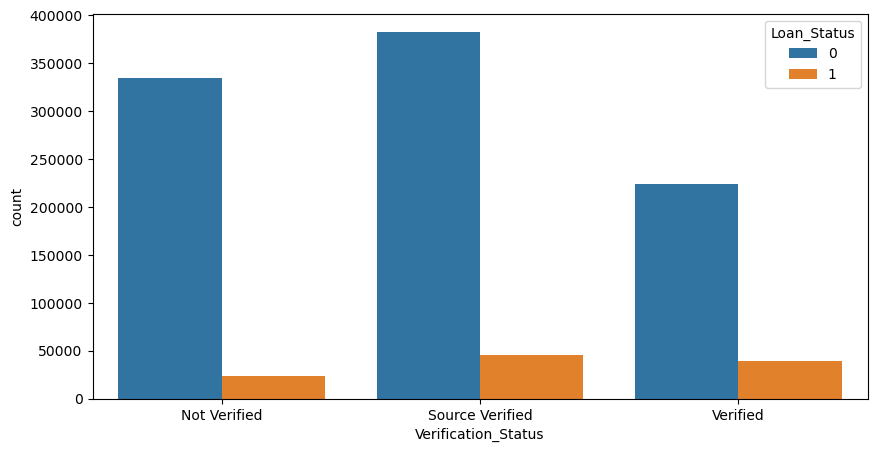

'Verification_Status' is a good predictor
p_val=0.0



In [21]:
# Loop over each categorical variable
for i in obj:
    print(i + ":")
    
    # Plot countplot
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, hue="Loan_Status", x=i)
    plt.show()
    
    # Perform chi-square test
    crosstab_result = pd.crosstab(df["Loan_Status"], df[i])
    stats, p, dof, _ = chi2_contingency(crosstab_result, correction=False)
    
    # Determine if predictor is good or bad
    if p > 0.05:
        print(Fore.RED + "'{}' is a bad predictor".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(Fore.GREEN + "'{}' is a good predictor".format(i))
        print('p_val={}\n'.format(p))

In [22]:

from sklearn.preprocessing import LabelEncoder

In [23]:
#Select the categorical columns and loop them for label encoding
for col in df.select_dtypes(include='object').columns:
    print(f'{col}:{df[col].unique()}')

Sub_Grade_M:['C' 'D' 'B' 'A' 'E' 'F' 'G']
Home_Ownership:['RENT' 'MORTGAGE' 'OWN' 'ANY']
Verification_Status:['Not Verified' 'Source Verified' 'Verified']


In [24]:
#Check the lable encoding for the categorical varibels
for col in df.select_dtypes(include='object').columns:

    lable_encod=LabelEncoder()
    lable_encod.fit(df[col].unique())
    df[col]=lable_encod.transform(df[col])
    print(f'{col}: {df[col].unique()}')

Sub_Grade_M: [2 3 1 0 4 5 6]
Home_Ownership: [3 1 2 0]
Verification_Status: [0 1 2]


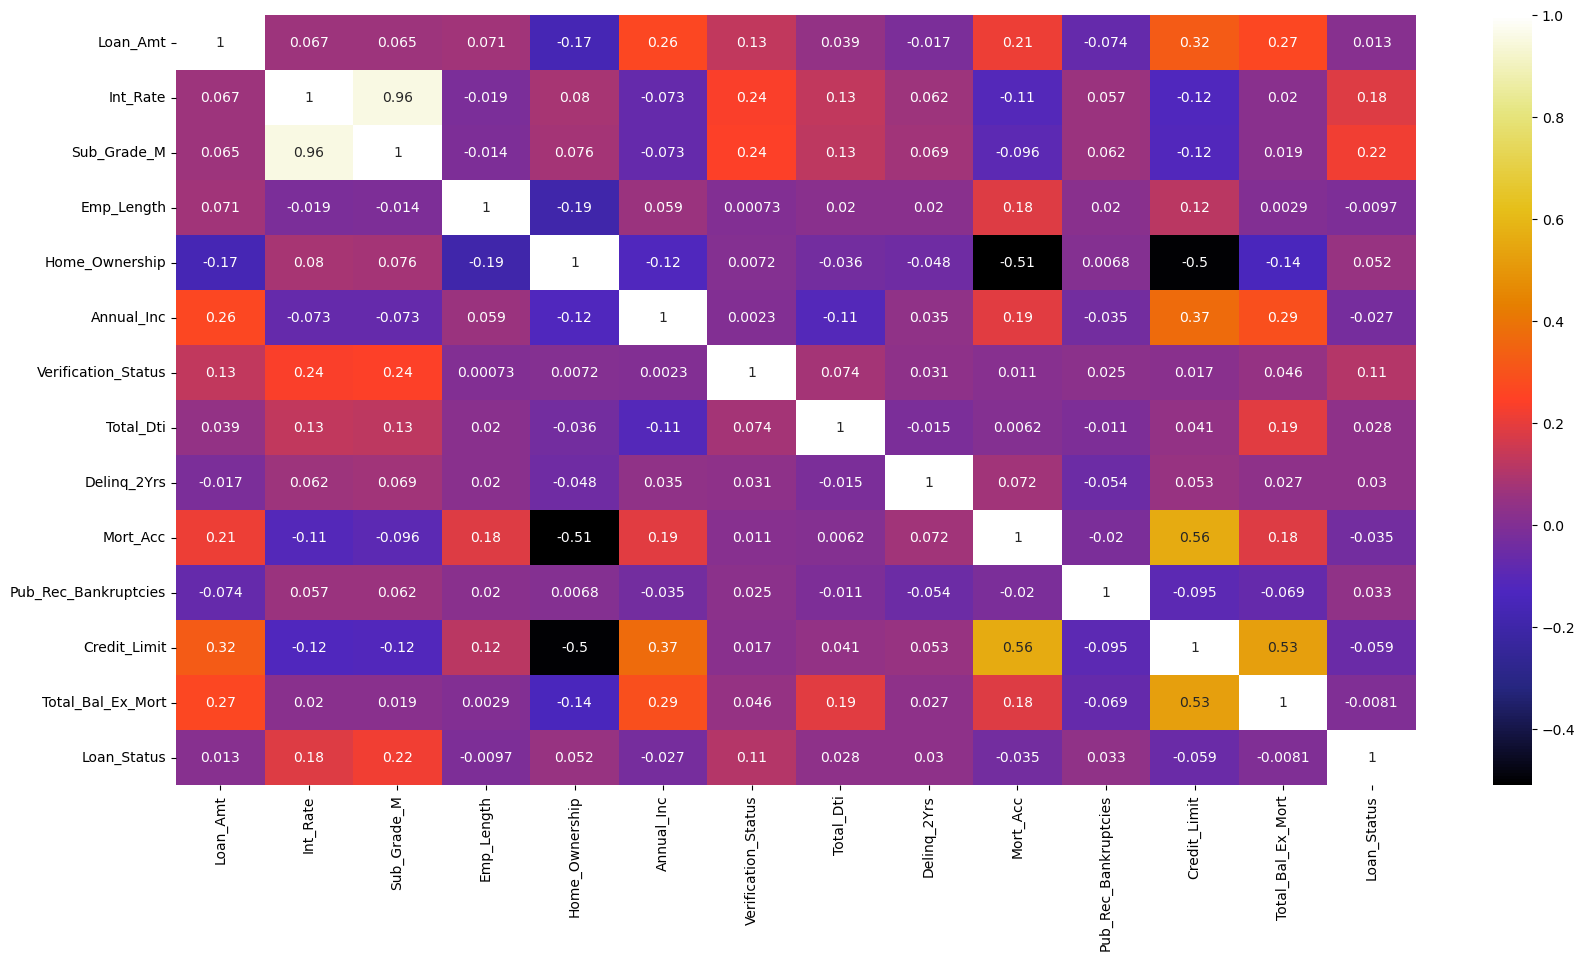

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap='CMRmap',annot=True);

In [26]:
#split the data for test and train sets
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']
print(x.shape)
print(y.shape)

(1048574, 13)
(1048574,)


In [27]:
#split the train data 80% and test data 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
from scipy import stats

In [29]:
#outlier removal for numerical columns
sel_col=['Loan_Amt', 'Int_Rate', 'Sub_Grade_M', 'Emp_Length', 'Home_Ownership', 'Annual_Inc', 'Verification_Status', 'Total_Dti', 'Delinq_2Yrs', 'Mort_Acc', 'Pub_Rec_Bankruptcies', 'Credit_Limit', 'Total_Bal_Ex_Mort']

z_score=np.abs(stats.zscore(x_train[sel_col]))
threshold=3
outlier_inde=np.where(z_score > threshold)[0]
X_Train=x_train.drop(x_train.index[outlier_inde])
Y_Train=y_train.drop(y_train.index[outlier_inde])


In [30]:
#import the necessary library for train the data and validation for test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

In [31]:
#import the decision tree library and finetune the parmeter using gridserach
decison_tree=DecisionTreeClassifier(class_weight='balanced')
pram_grid={
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2],
    "random_state": [0, 42]
}

grid_search=GridSearchCV(decison_tree,pram_grid,cv=5)
grid_search.fit(X_Train,Y_Train)
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [32]:
#lets feed the data to train the model along with parameter
dtree=DecisionTreeClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=2,random_state=42)
dtree.fit(X_Train,Y_Train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [33]:
y_pred=dtree.predict(x_test)
print(f'Accuracy_score: {round(accuracy_score(y_test,y_pred)*100,2)}%')

Accuracy_score: 89.58%


In [34]:
#Check the accuracy score and log loss
from sklearn.metrics import f1_score,precision_score,recall_score,log_loss
print(f'fl_score :',round((f1_score(y_test,y_pred,average='micro')),2))
print(f'Precision_score :',round((precision_score(y_test,y_pred,average='micro')),2))
print(f'Recall_score :',round((recall_score(y_test,y_pred,average='micro')),2))
print(f'Log_loss :',round((log_loss(y_test,y_pred)),2))

fl_score : 0.9
Precision_score : 0.9
Recall_score : 0.9
Log_loss : 3.6


In [35]:
#lets check the features importance useing the dtree
im_ft=pd.DataFrame({"Feature_names":X_Train.columns,"Features_importance":dtree.feature_importances_})
fe=im_ft.sort_values(by='Features_importance',ascending=False)

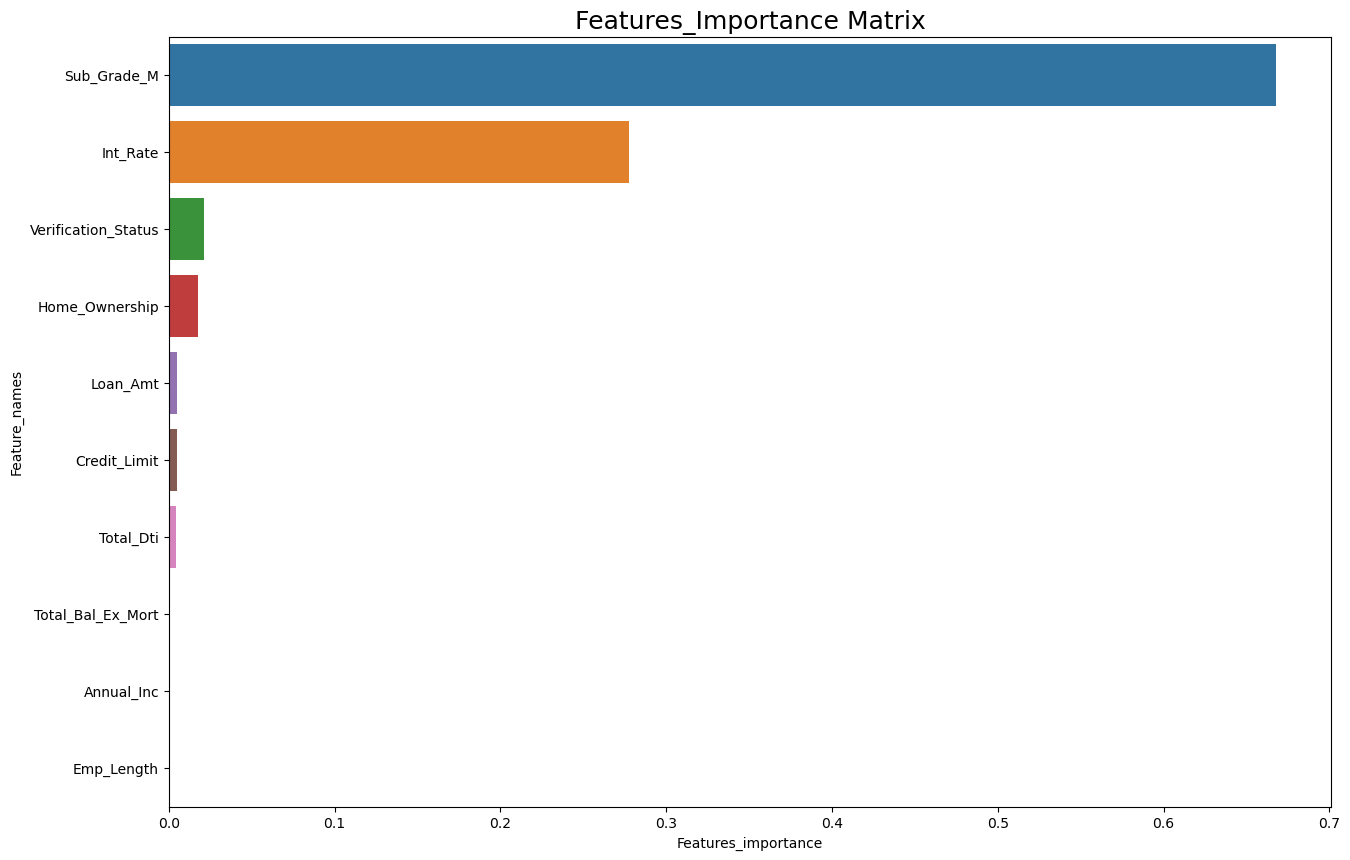

In [36]:
#plot the features importance matrix
fe1=fe.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=fe1,x="Features_importance",y="Feature_names")
plt.title("Features_Importance Matrix",fontsize=18)
plt.show()

In [37]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


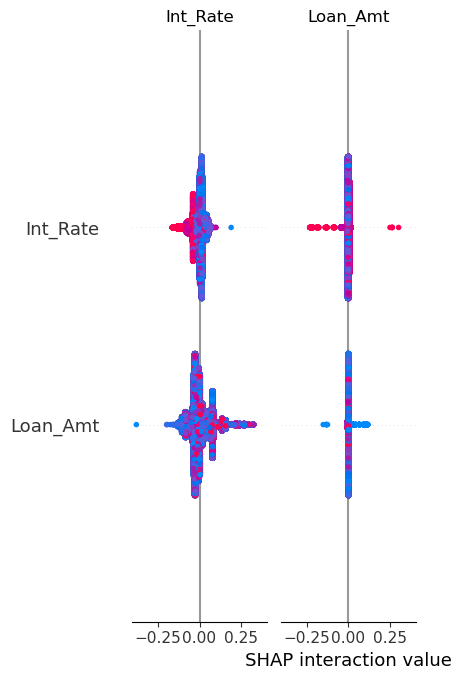

In [38]:
#using shap model to check the features importances
import shap
explianer=shap.TreeExplainer(dtree)
shap_values=explianer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

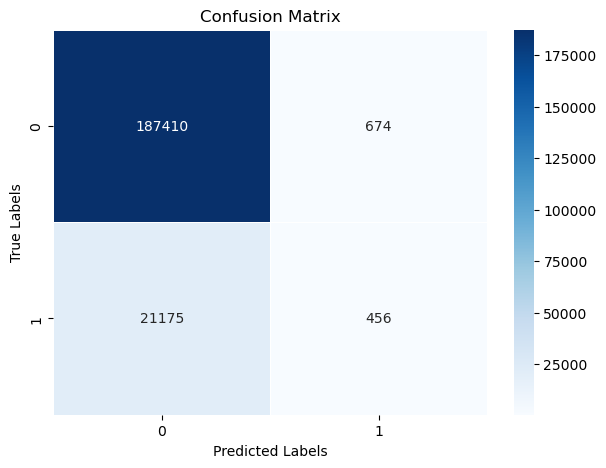

In [39]:
#plot the confusion matrix to check the true postive and false postive visa versa
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,annot=True,cmap="Blues",linewidths=0.5,fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

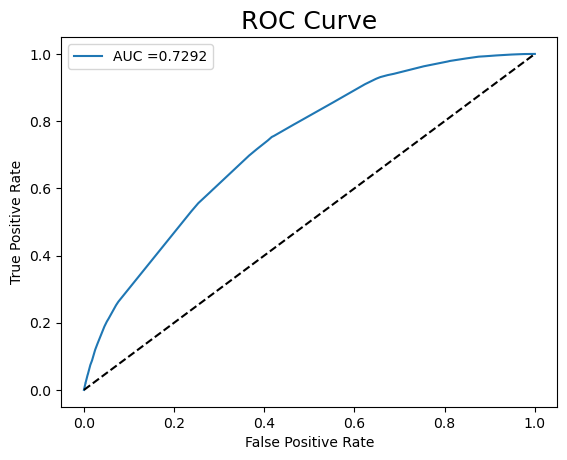

In [40]:
#lets plot the ROC curve bases on the predicted resluts
y_pred_prob=dtree.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();

In [41]:
#using RFC will check the prediction score
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest Classifier with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced')

# Define the parameter grid with fewer options
param_grid = {
    'n_estimators': [100],
    'max_depth': [0, 3],
    'max_features': ['sqrt'],
    'random_state': [0]
}

# Reduce the number of cross-validation folds to speed up the process
grid_search = GridSearchCV(rfc, param_grid, cv=3)

# Fit the grid search on the training data
grid_search.fit(X_Train, Y_Train)

# Print the best parameters found by the grid search
print(grid_search.best_params_)


C:\Users\sgrka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sgrka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sgrka\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\sgrka\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sgrka\anaconda3\lib\site-packages\jobli

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [43]:
#train the model using the output parameter
rfc1=RandomForestClassifier(n_estimators=200 ,max_depth=None ,max_features='sqrt',random_state=0)
rfc1.fit(X_Train,Y_Train)

RandomForestClassifier(max_features='sqrt', n_estimators=200, random_state=0)

In [44]:
#predict the based on the trainned model
y_prd=rfc1.predict(x_test)
print(f'Accuracy Score: {round(accuracy_score(y_test,y_prd)*100,2)}%')

Accuracy Score: 89.6%


In [45]:
print(f'F1_score :{round(f1_score(y_test,y_prd,average="micro")*100,2)}')
print(f'Precision_score :{round(precision_score(y_test,y_prd,average="micro")*100,2)}')
print(f'Recall score :{round(recall_score(y_test,y_prd,average="micro")*100,2)}')
print(f'Log_loss :{round(log_loss(y_test,y_prd),2)}')

F1_score :89.6
Precision_score :89.6
Recall score :89.6
Log_loss :3.59


In [ ]:
#check the features importance using rfc
imp_fea=pd.DataFrame({"Feature_name":X_Train.columns,"importance":rfc1.feature_importances_})
imp_fea1=imp_fea.sort_values(by='importance',ascending=False)

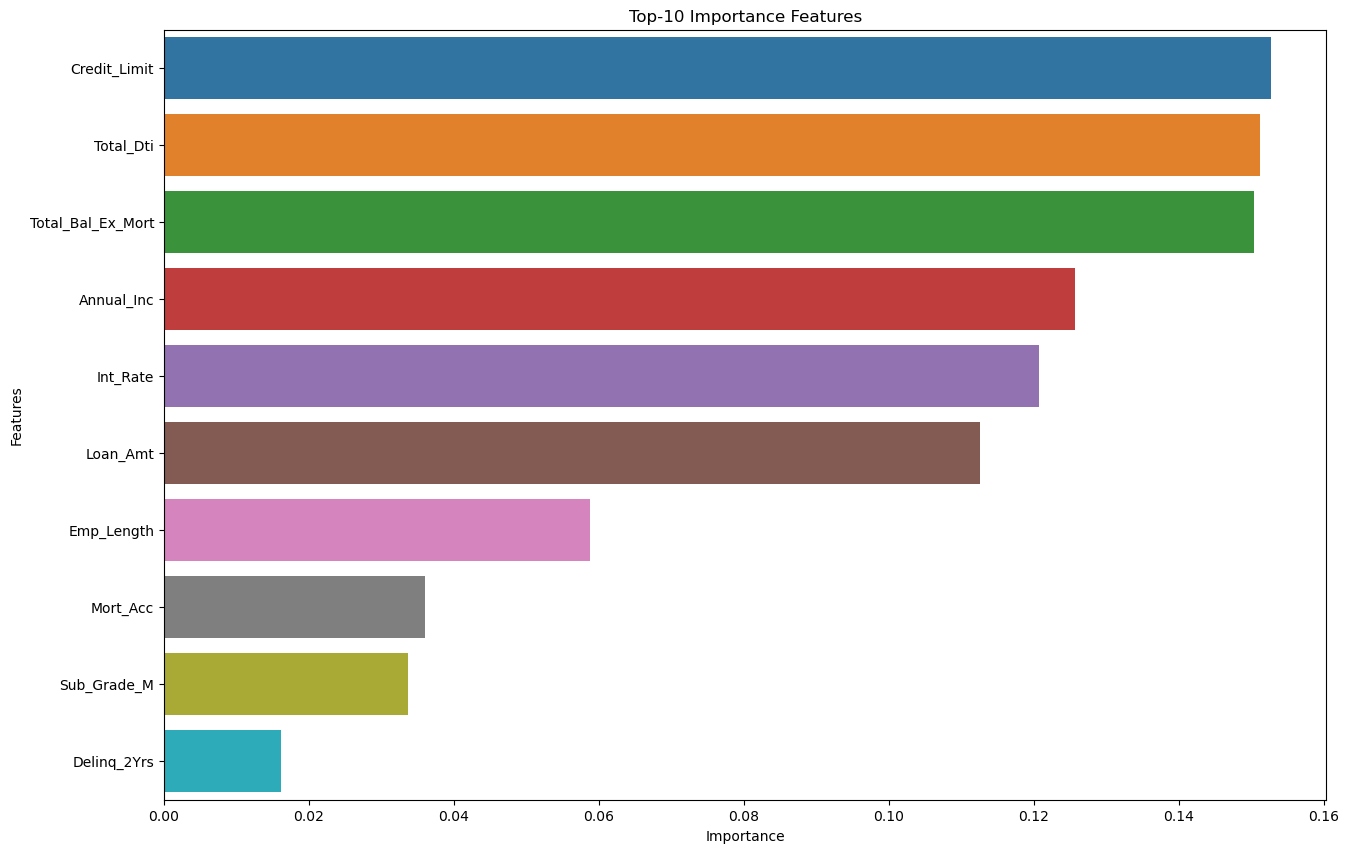

In [47]:
#plot the features importance
imp_fea2=imp_fea1.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=imp_fea2,x="importance",y="Feature_name")
plt.title('Top-10 Importance Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

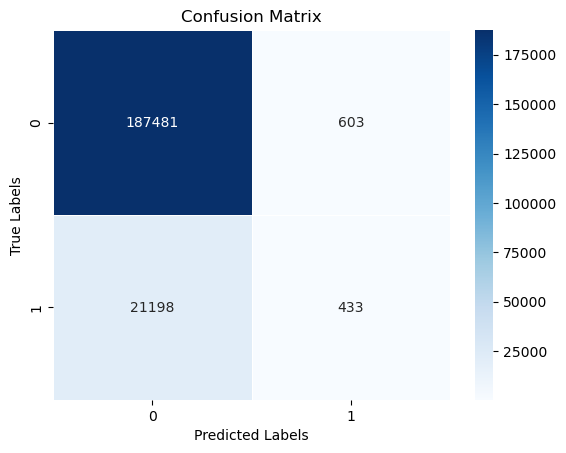

In [48]:
#plot the confusion matrix 
cm1=confusion_matrix(y_test,y_prd)
sns.heatmap(data=cm1,annot=True,cmap="Blues",linewidths=0.5,fmt="d");
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

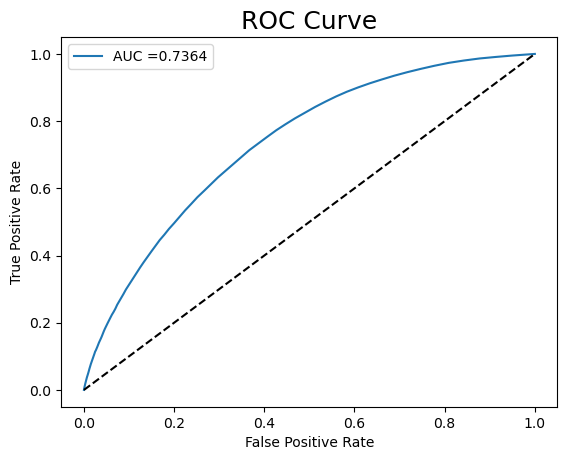

In [49]:
#plot the ROC curve using RFC predicted result
y_pred_prob=rfc1.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();